In [330]:
# importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [332]:
# load datas
df_demo = pd.read_excel('Customer_Churn_Data_Large.xlsx', sheet_name='Customer_Demographics')
df_trans = pd.read_excel('Customer_Churn_Data_Large.xlsx', sheet_name='Transaction_History')
df_service = pd.read_excel('Customer_Churn_Data_Large.xlsx', sheet_name='Customer_Service')
df_activities = pd.read_excel('Customer_Churn_Data_Large.xlsx', sheet_name='Online_Activity')
df_status = pd.read_excel('Customer_Churn_Data_Large.xlsx', sheet_name='Churn_Status')


In [333]:
df_trans.head()

,CustomerID,TransactionID,TransactionDate,AmountSpent,ProductCategory
0,1,7194,2022-03-27,416.50,Electronics
1,2,7250,2022-08-08,54.96,Clothing
2,2,9660,2022-07-25,197.50,Electronics
3,2,2998,2022-01-25,101.31,Furniture
4,2,1228,2022-07-24,397.37,Clothing


In [336]:
trans_demo = df_demo.merge(df_trans, on='CustomerID', how='left')
service_trans_demo = trans_demo.merge(df_service, on='CustomerID', how='left')
activities_service_trans_demo = service_trans_demo.merge(df_activities, on='CustomerID', how='left')
df = activities_service_trans_demo.merge(df_status, on='CustomerID', how='left')

In [338]:
df.head()

,CustomerID,Age,Gender,MaritalStatus,IncomeLevel,TransactionID,TransactionDate,AmountSpent,ProductCategory,InteractionID,InteractionDate,InteractionType,ResolutionStatus,LastLoginDate,LoginFrequency,ServiceUsage,ChurnStatus
0,1,62,M,Single,Low,7194,2022-03-27,416.50,Electronics,6363.0,2022-03-31,Inquiry,Resolved,2023-10-21,34,Mobile App,0
1,2,65,M,Married,Low,7250,2022-08-08,54.96,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
2,2,65,M,Married,Low,9660,2022-07-25,197.50,Electronics,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
3,2,65,M,Married,Low,2998,2022-01-25,101.31,Furniture,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1
4,2,65,M,Married,Low,1228,2022-07-24,397.37,Clothing,3329.0,2022-03-17,Inquiry,Resolved,2023-12-05,5,Website,1


#### Important Features
- Demographic variables: Age, Gender, MaritalStatus, IncomeLevel
- Transaction variables: AmountSpent, ProductCategory
- Customer variables Features: InteractionType, ResolutionStatus
- Online Activities variables: LoginFrequency, ServiceUsage
- Churn Status variables: ChurnStatus

### Excluded Variables
- TransactionID, TransactionDate, InteractionDate, InteractionID, LastLoginDate
These variables has nothing to do with customer getting churned. So, we exclude this from our dataframe

In [341]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel',
       'TransactionID', 'TransactionDate', 'AmountSpent', 'ProductCategory',
       'InteractionID', 'InteractionDate', 'InteractionType',
       'ResolutionStatus', 'LastLoginDate', 'LoginFrequency', 'ServiceUsage',
       'ChurnStatus'],
      dtype='object')

In [343]:
cols_to_drop = ['CustomerID','TransactionID','TransactionDate','InteractionID', 'InteractionDate', 'LastLoginDate']
df = df.drop(columns=cols_to_drop)

In [345]:
df.columns

Index(['Age', 'Gender', 'MaritalStatus', 'IncomeLevel', 'AmountSpent',
       'ProductCategory', 'InteractionType', 'ResolutionStatus',
       'LoginFrequency', 'ServiceUsage', 'ChurnStatus'],
      dtype='object')

# Exploratory Data Analysis

In [348]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               6812 non-null   int64  
 1   Gender            6812 non-null   object 
 2   MaritalStatus     6812 non-null   object 
 3   IncomeLevel       6812 non-null   object 
 4   AmountSpent       6812 non-null   float64
 5   ProductCategory   6812 non-null   object 
 6   InteractionType   5204 non-null   object 
 7   ResolutionStatus  5204 non-null   object 
 8   LoginFrequency    6812 non-null   int64  
 9   ServiceUsage      6812 non-null   object 
 10  ChurnStatus       6812 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 585.5+ KB


In [350]:
### Descriptive Statistic
df.describe()

,Age,AmountSpent,LoginFrequency,ChurnStatus
count,6812.000000,6812.000000,6812.000000,6812.000000
mean,43.274516,251.620527,25.724310,0.198473
std,15.286788,142.901693,14.062032,0.398880
min,18.000000,5.180000,1.000000,0.000000
25%,30.000000,127.100000,14.000000,0.000000
50%,44.000000,251.845000,26.000000,0.000000
75%,56.000000,375.280000,38.000000,0.000000
max,69.000000,499.860000,49.000000,1.000000


### Univariate Analysis

In [353]:
cat_cols = df.select_dtypes(include= 'object').columns
cat_cols

Index(['Gender', 'MaritalStatus', 'IncomeLevel', 'ProductCategory',
       'InteractionType', 'ResolutionStatus', 'ServiceUsage'],
      dtype='object')

In [355]:
def univariate_plot(col, data):
    sns.countplot(x=col, data= data)
    plt.title(col+ "Distribution")
    plt.show()    

#### 1. Distribution of Gender

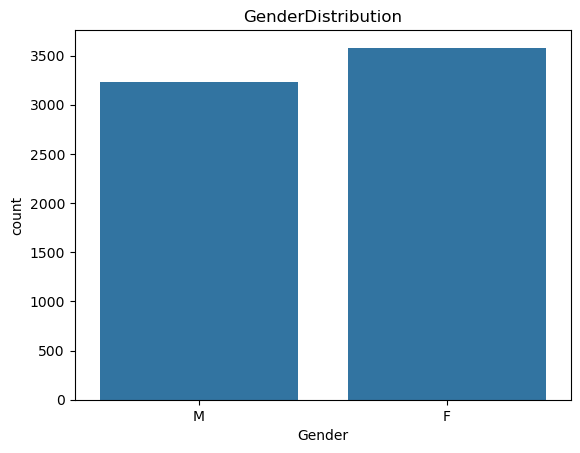

In [358]:
univariate_plot('Gender', df)

#### Majority of the customers are female. However, there is no huge difference in the gender distribution

####

#### 2. Distribution of Marital Status

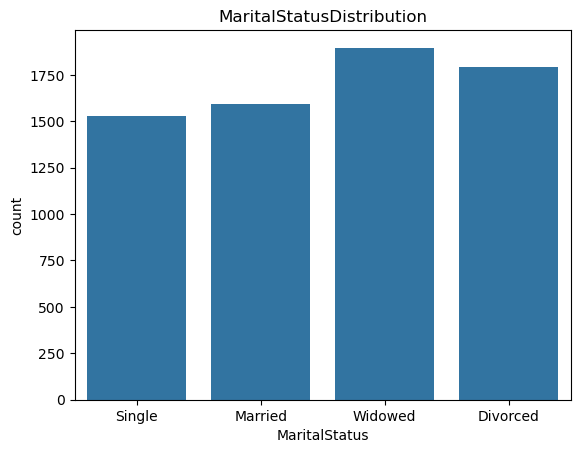

In [363]:
univariate_plot('MaritalStatus', df)

#### Majority of the customers belongs to Widowed. Single and Married customer are slightly less in our business

####

### 3. Distribution of Income Level

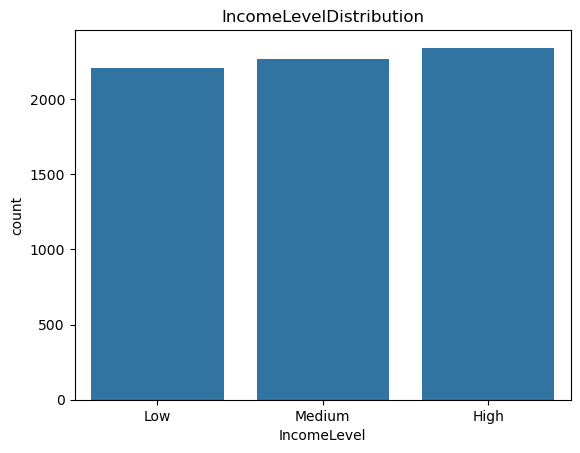

In [368]:
univariate_plot('IncomeLevel', df)

### There is almost equal proportion in all level of income.

####

### 4. Distribution of Product Category 

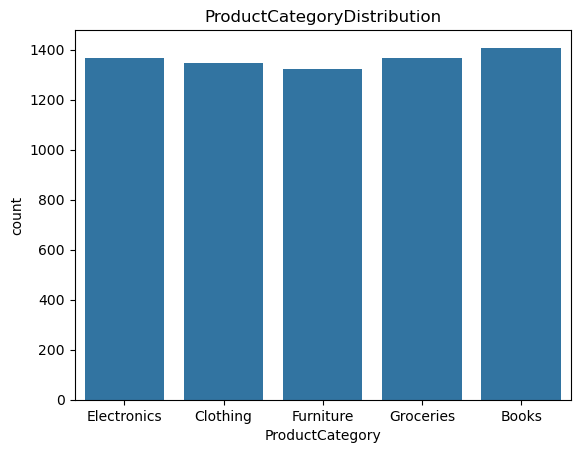

In [373]:
univariate_plot('ProductCategory', df)

### There is almost equal proportion in all product category.

### 5. Distribution of Interaction Type

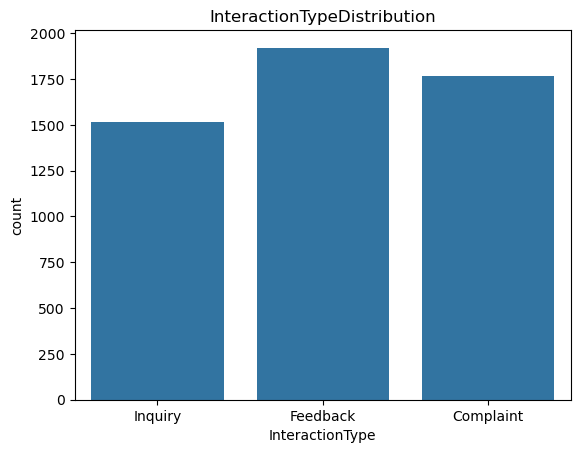

In [377]:
univariate_plot('InteractionType', df)

### Most of the customers have feedback for our business which can be positive and negative. We are also getting high numbers of complaint after feedback which needs to be reduced.

####

### 6. Distribution of Resolution Status

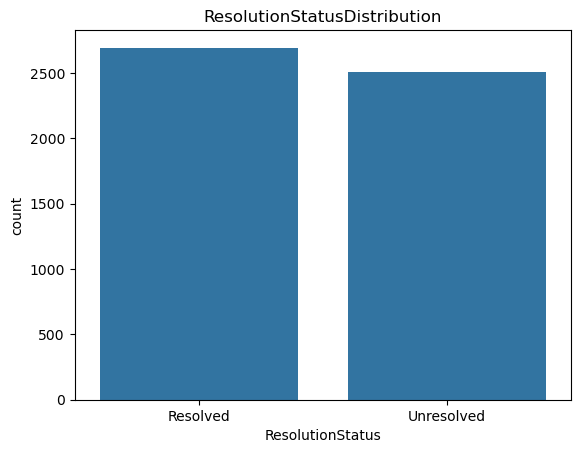

In [382]:
univariate_plot('ResolutionStatus', df)

#### There is almost equal number of unresolved status which can be very crucial factor for customer churning

####

### 7. Distribution of ServiceUsage

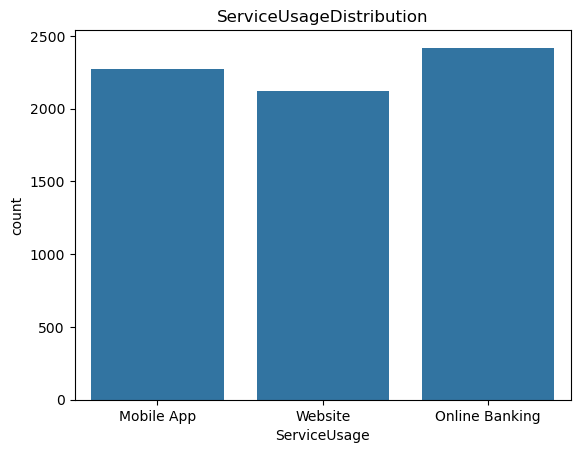

In [387]:
univariate_plot('ServiceUsage', df)

#### Most of our customer uses Online Banking to use our services.

####

### 8. Distribution of Customer Churn

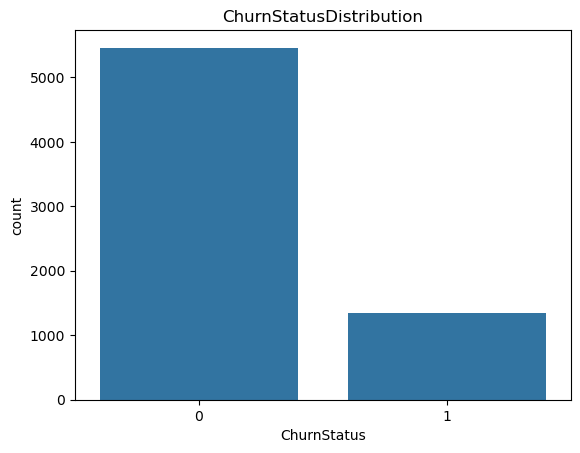

In [392]:
univariate_plot('ChurnStatus', df)

#### Around 25% of our customers are getting churn which is a greater proportion and need to reduced.

#### 

In [396]:
num_cols = df.select_dtypes(include=['float64','int64']).columns
num_cols

Index(['Age', 'AmountSpent', 'LoginFrequency', 'ChurnStatus'], dtype='object')

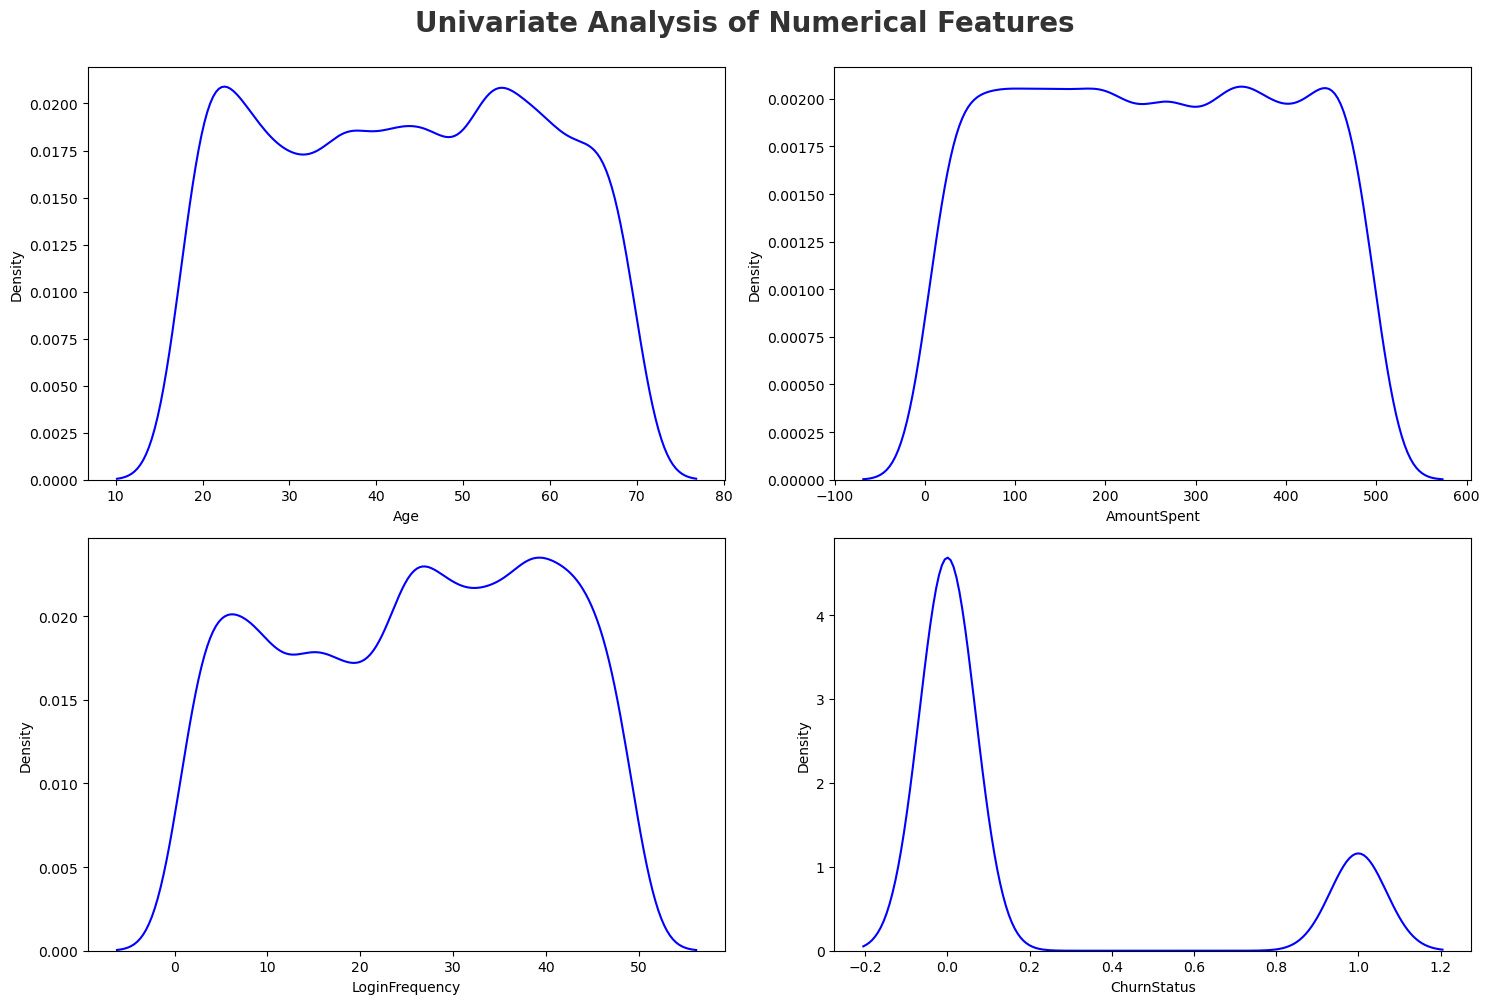

In [398]:
plt.figure(figsize=(15, 10))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(num_cols)):
    plt.subplot(2, 2, i+1)
    sns.kdeplot(x=df[num_cols[i]], color='blue')
    plt.xlabel(num_cols[i])
    plt.tight_layout()

### 2. Bi-variate Analysis of Categorical Features

In [401]:
def bivariate_plot(col):
    plt.subplots(figsize=(20,20))
    sns.countplot(x=col,hue="ChurnStatus", data=df, ec= "black",palette="Accent")
    plt.title(col+ " vs Churn", weight="bold",fontsize=20, pad=20)
    plt.ylabel("Count", weight="bold", fontsize=12)
    plt.xlabel(col, weight="bold", fontsize=16)
    plt.legend(title="Churn", fancybox=True)
    plt.show()

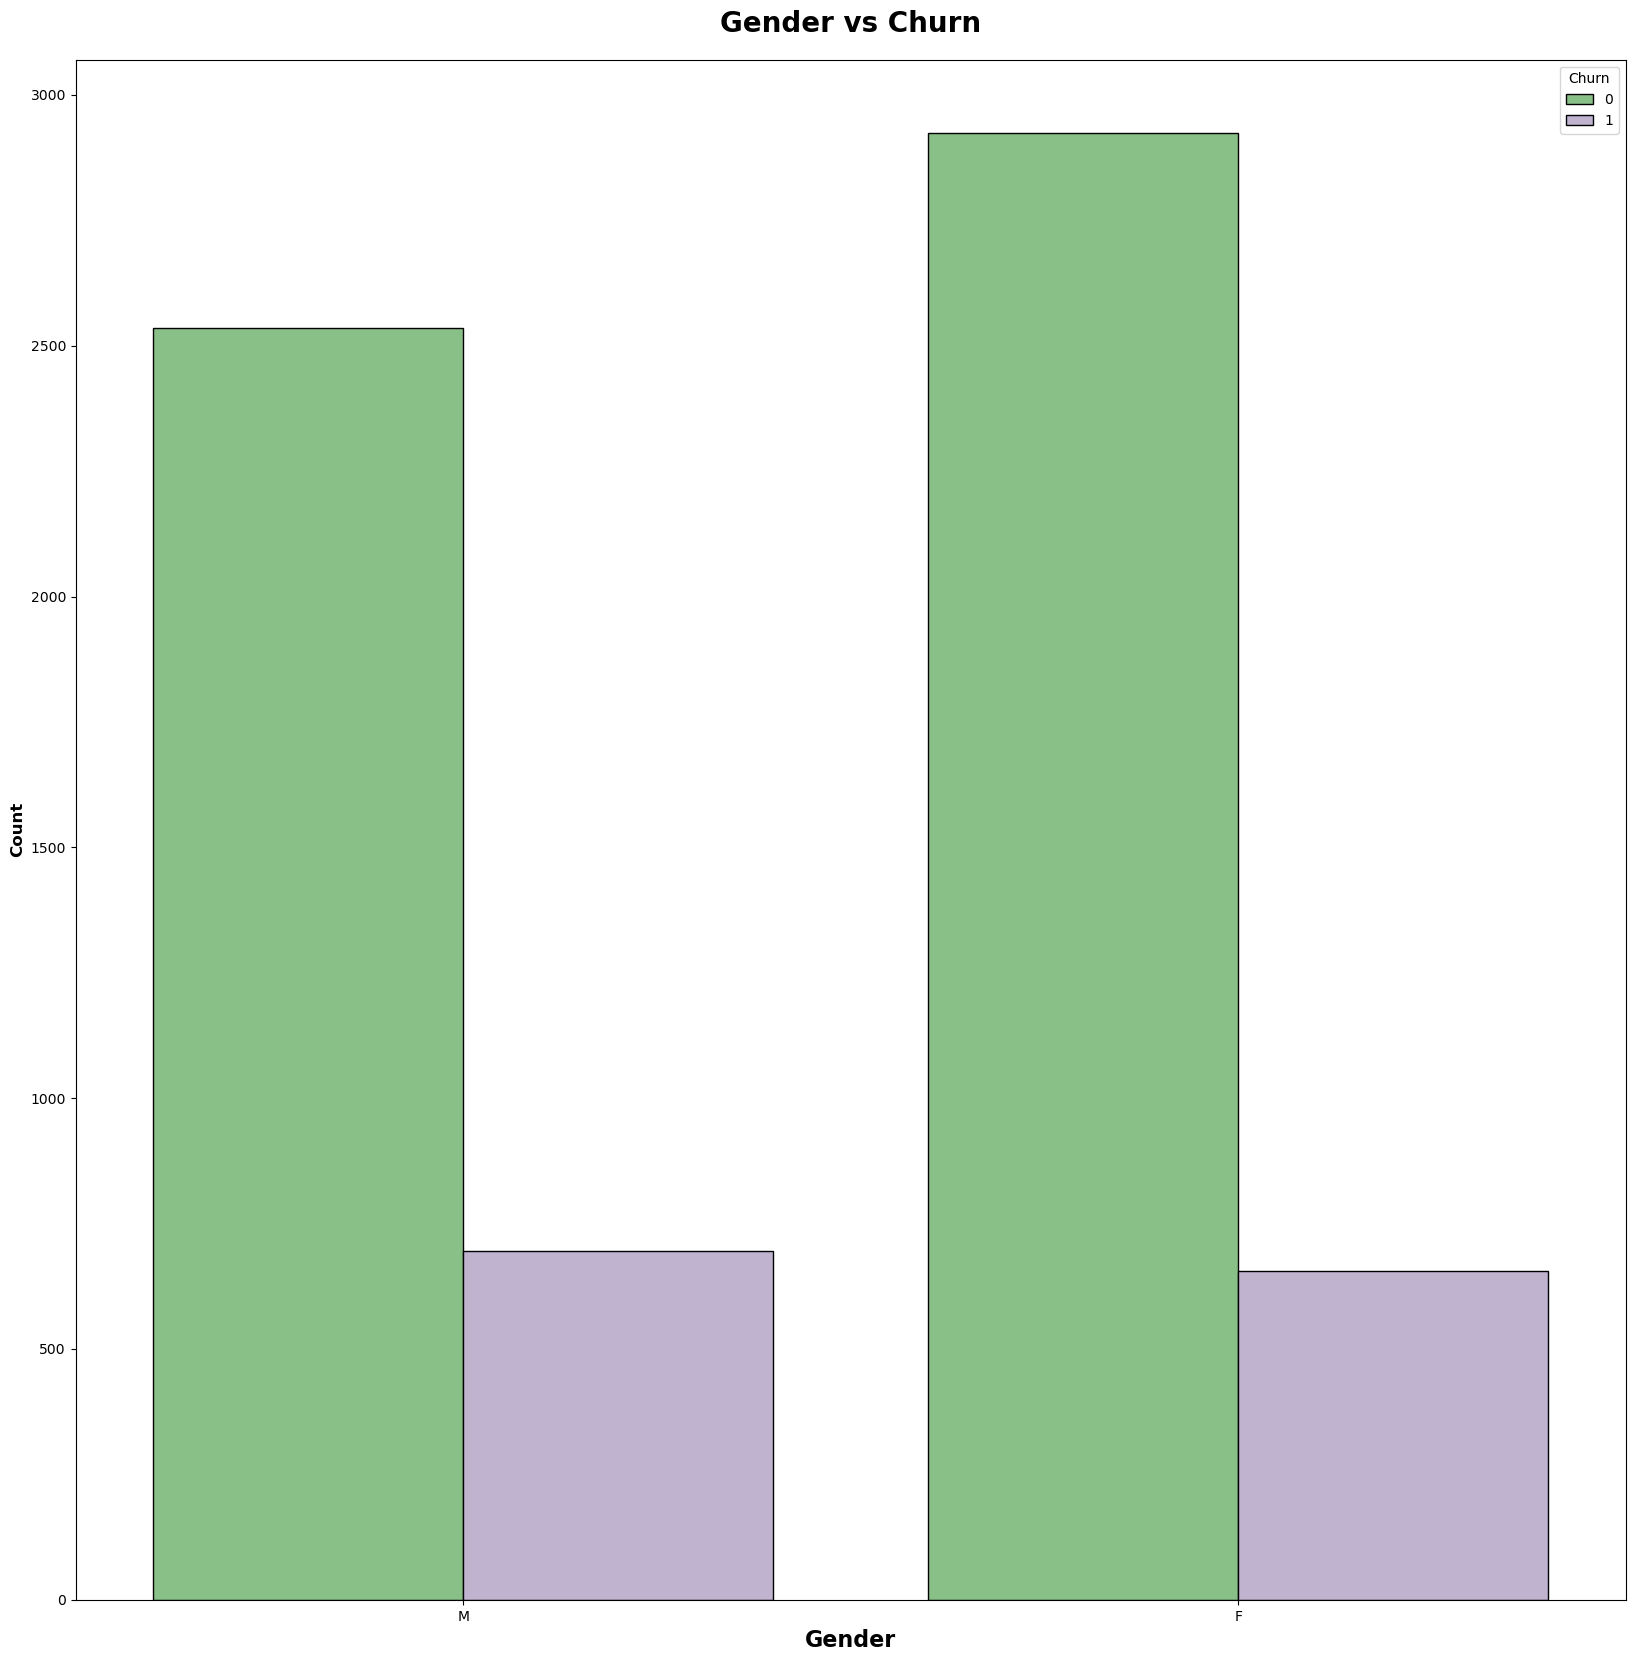

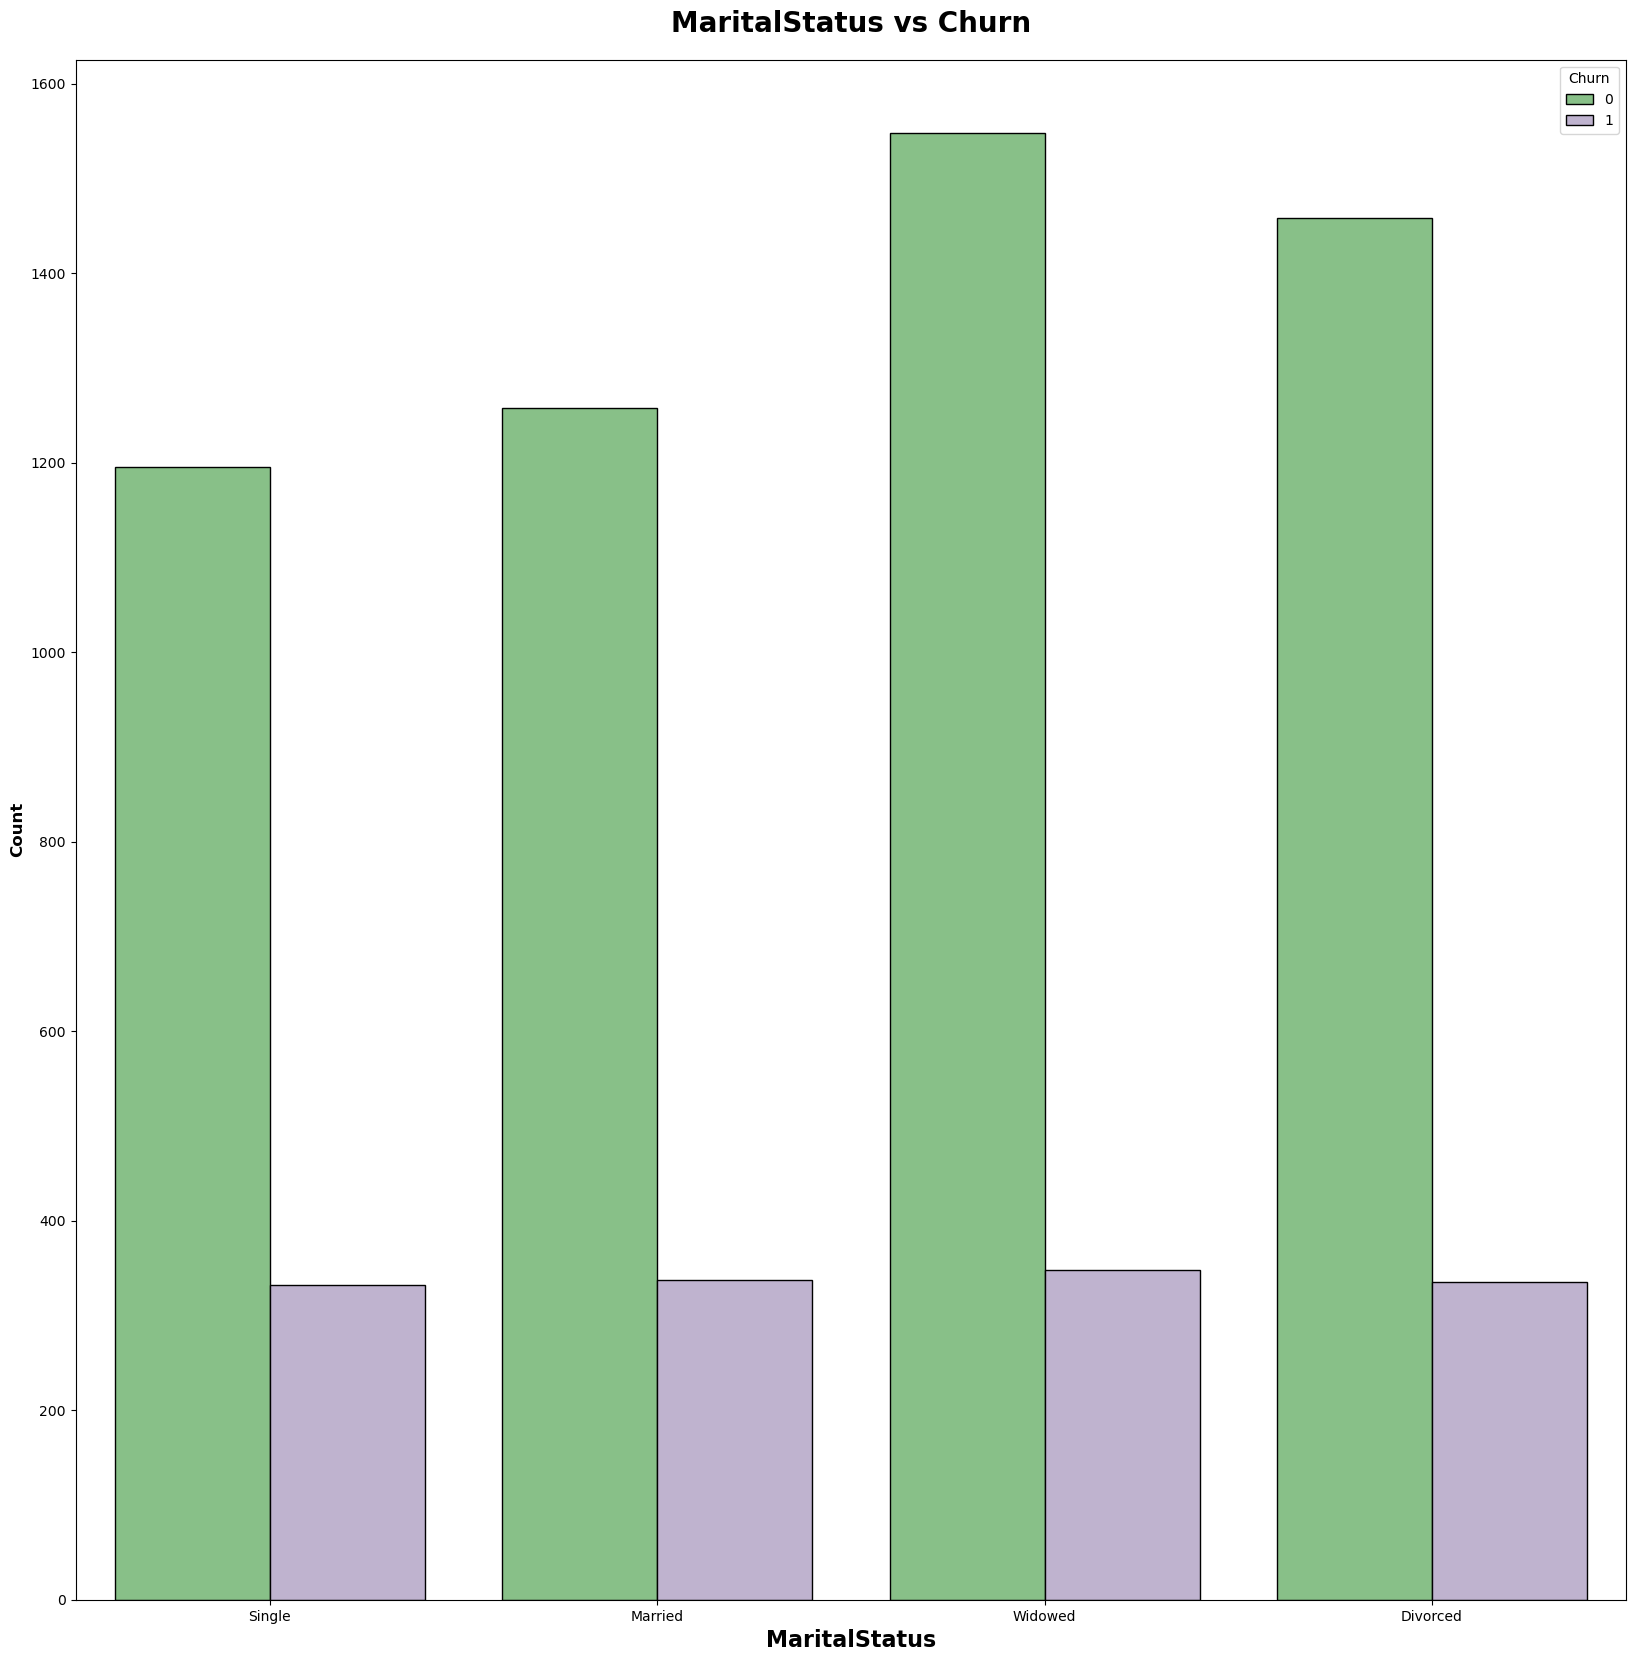

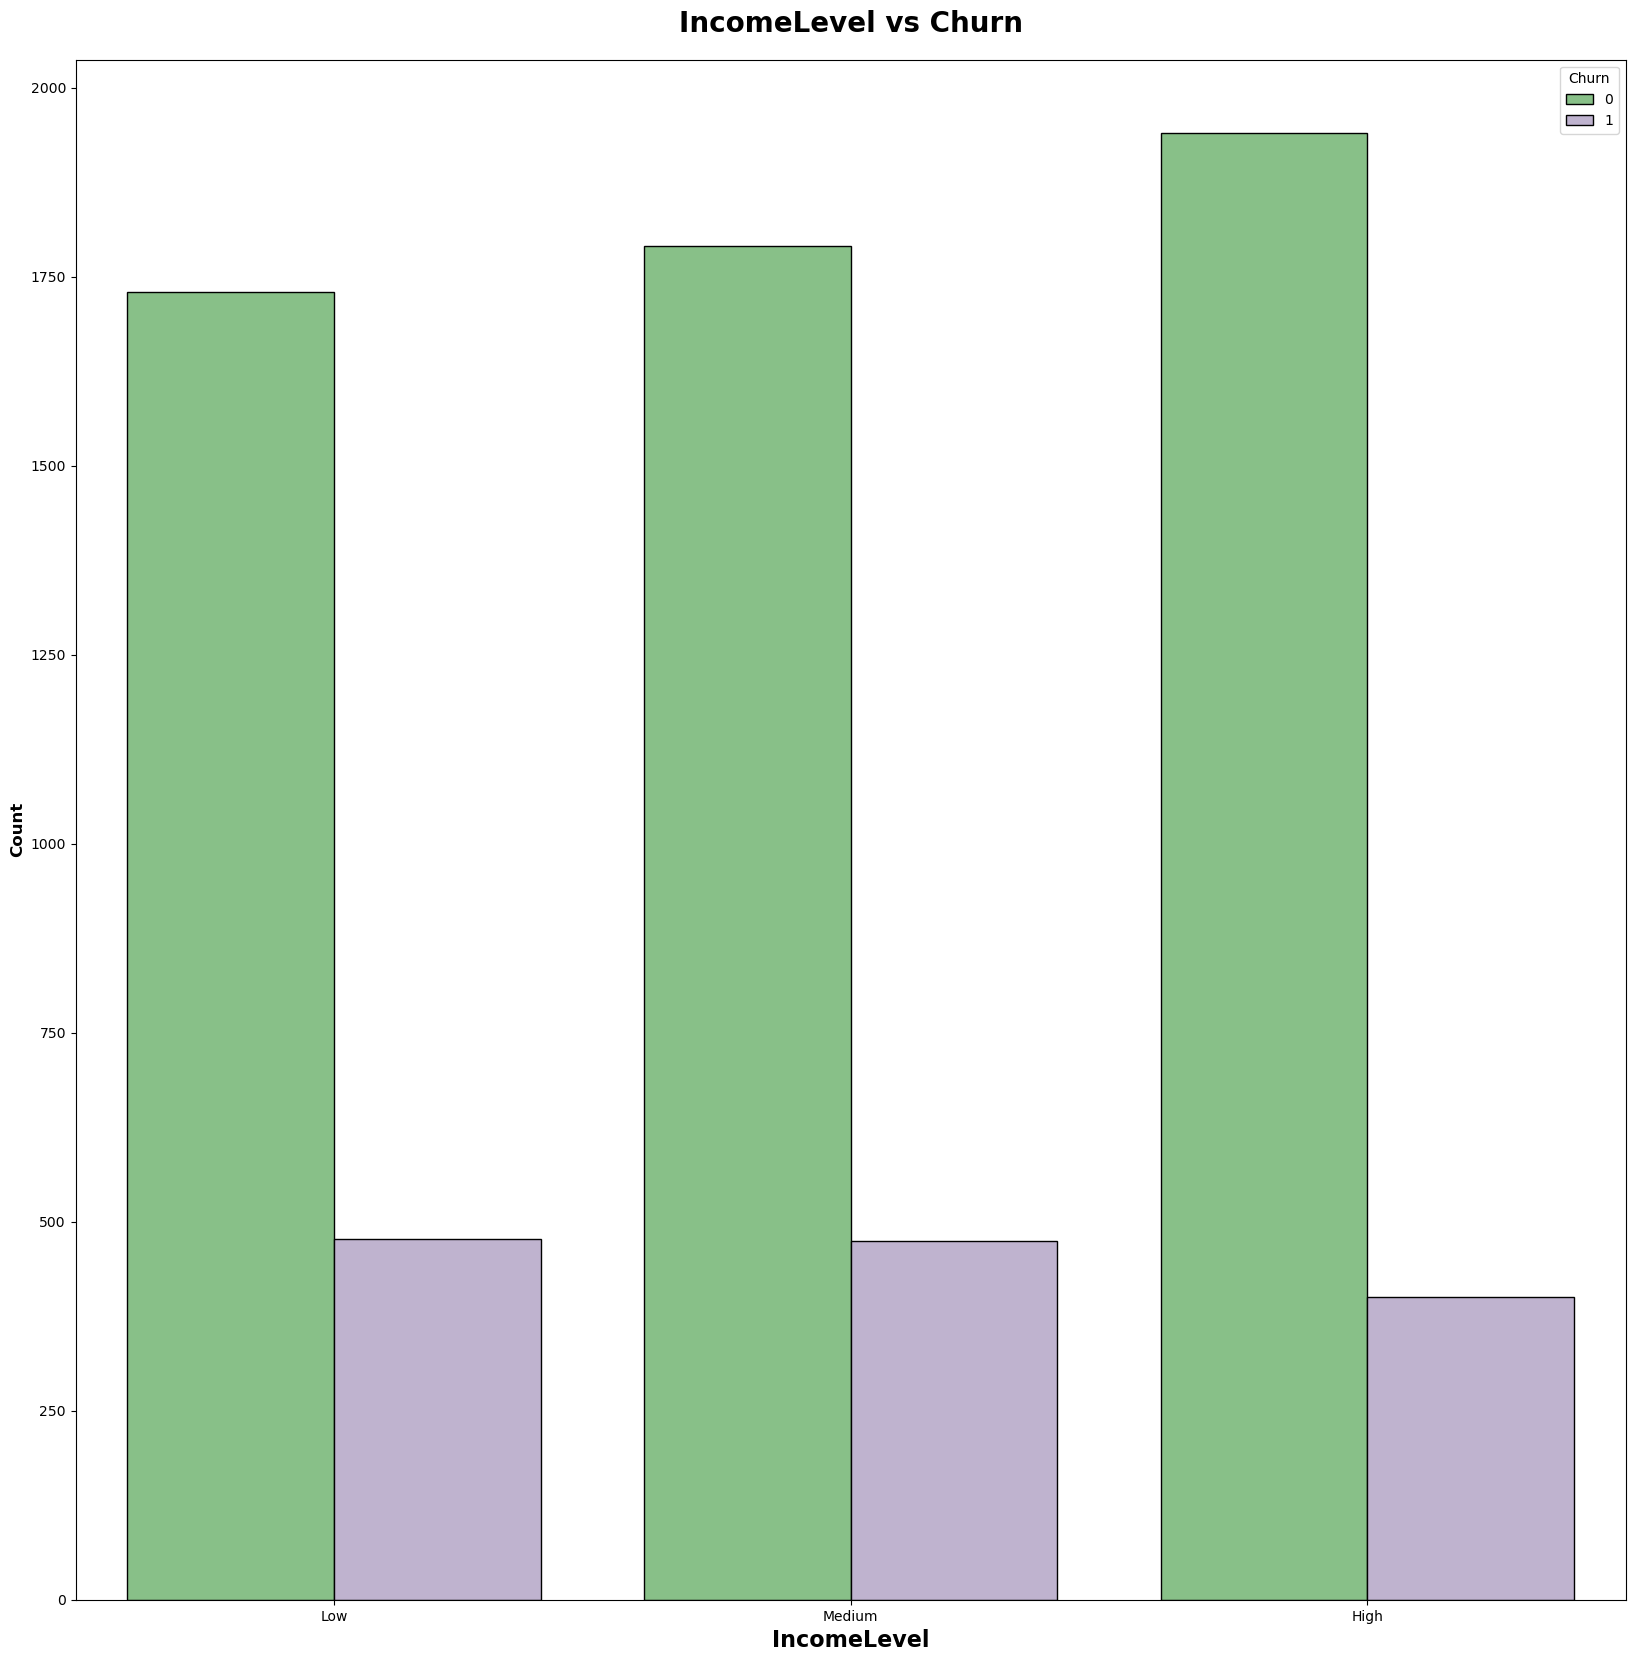

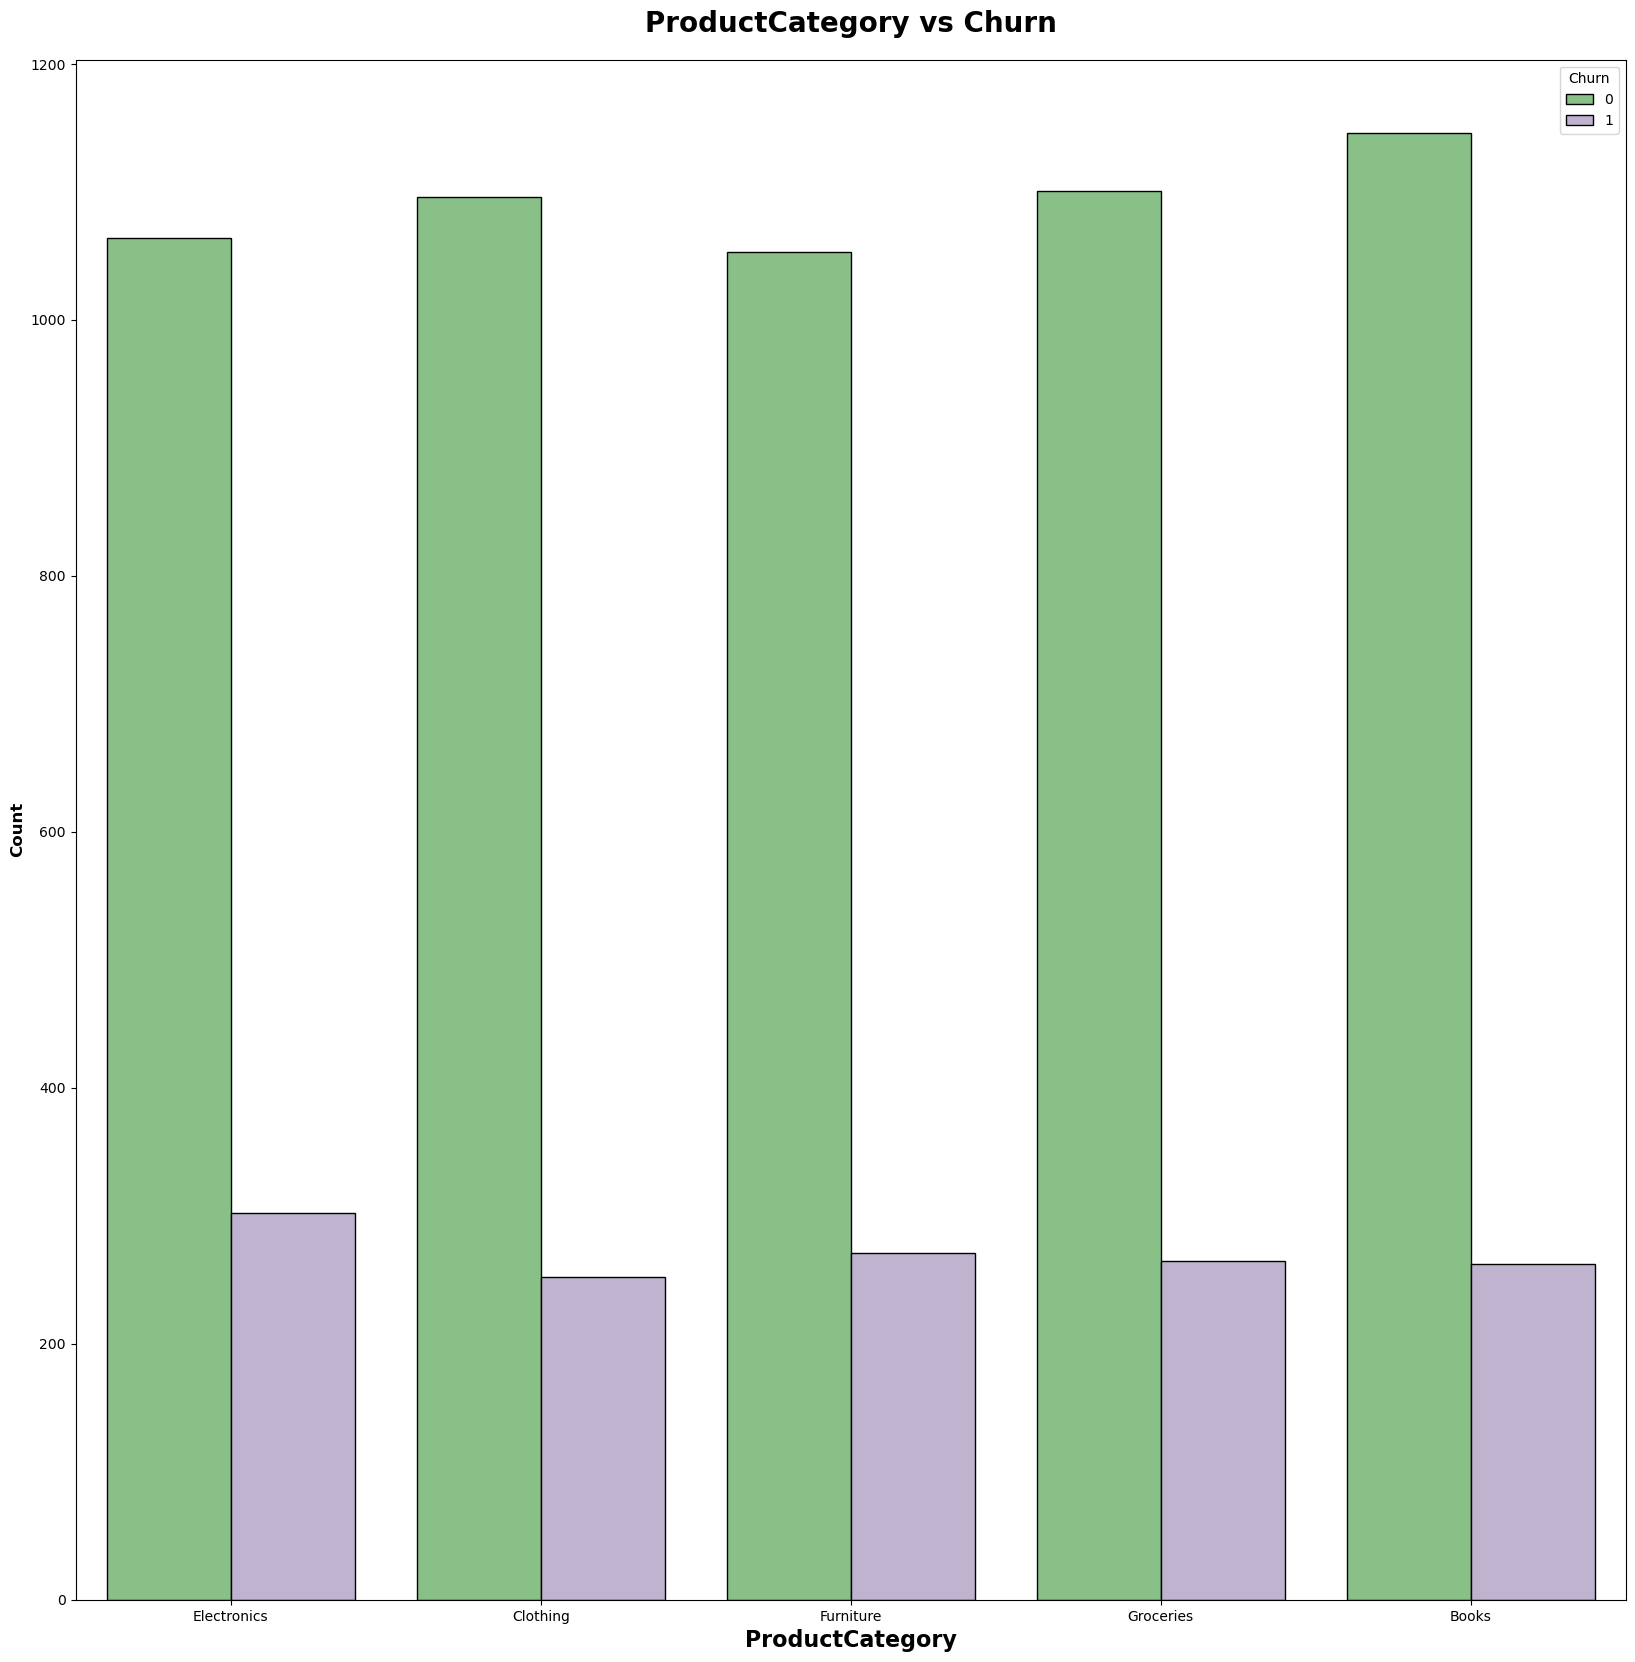

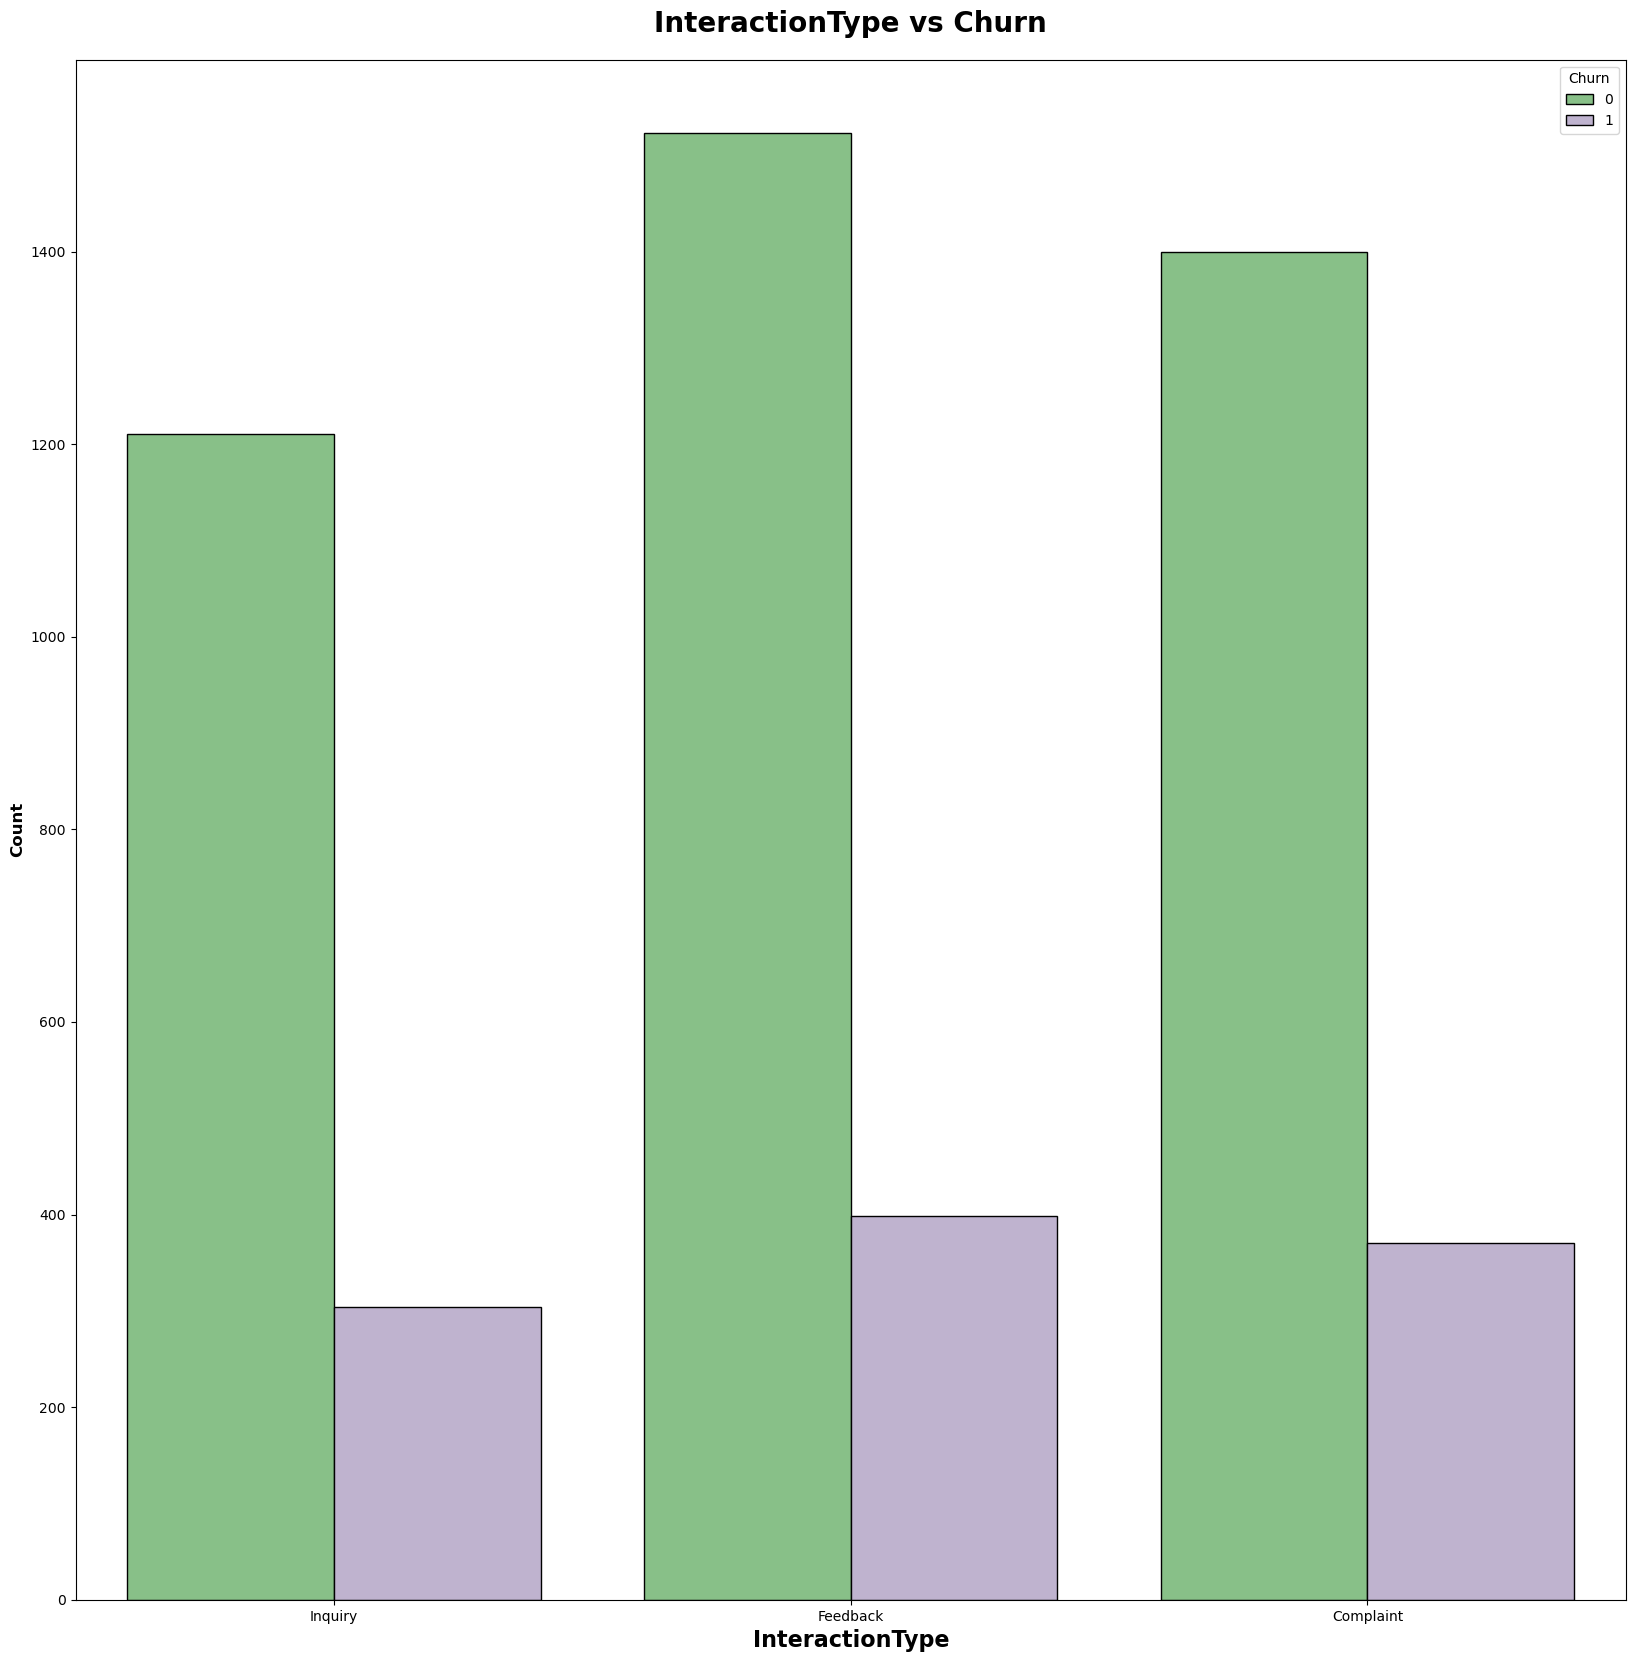

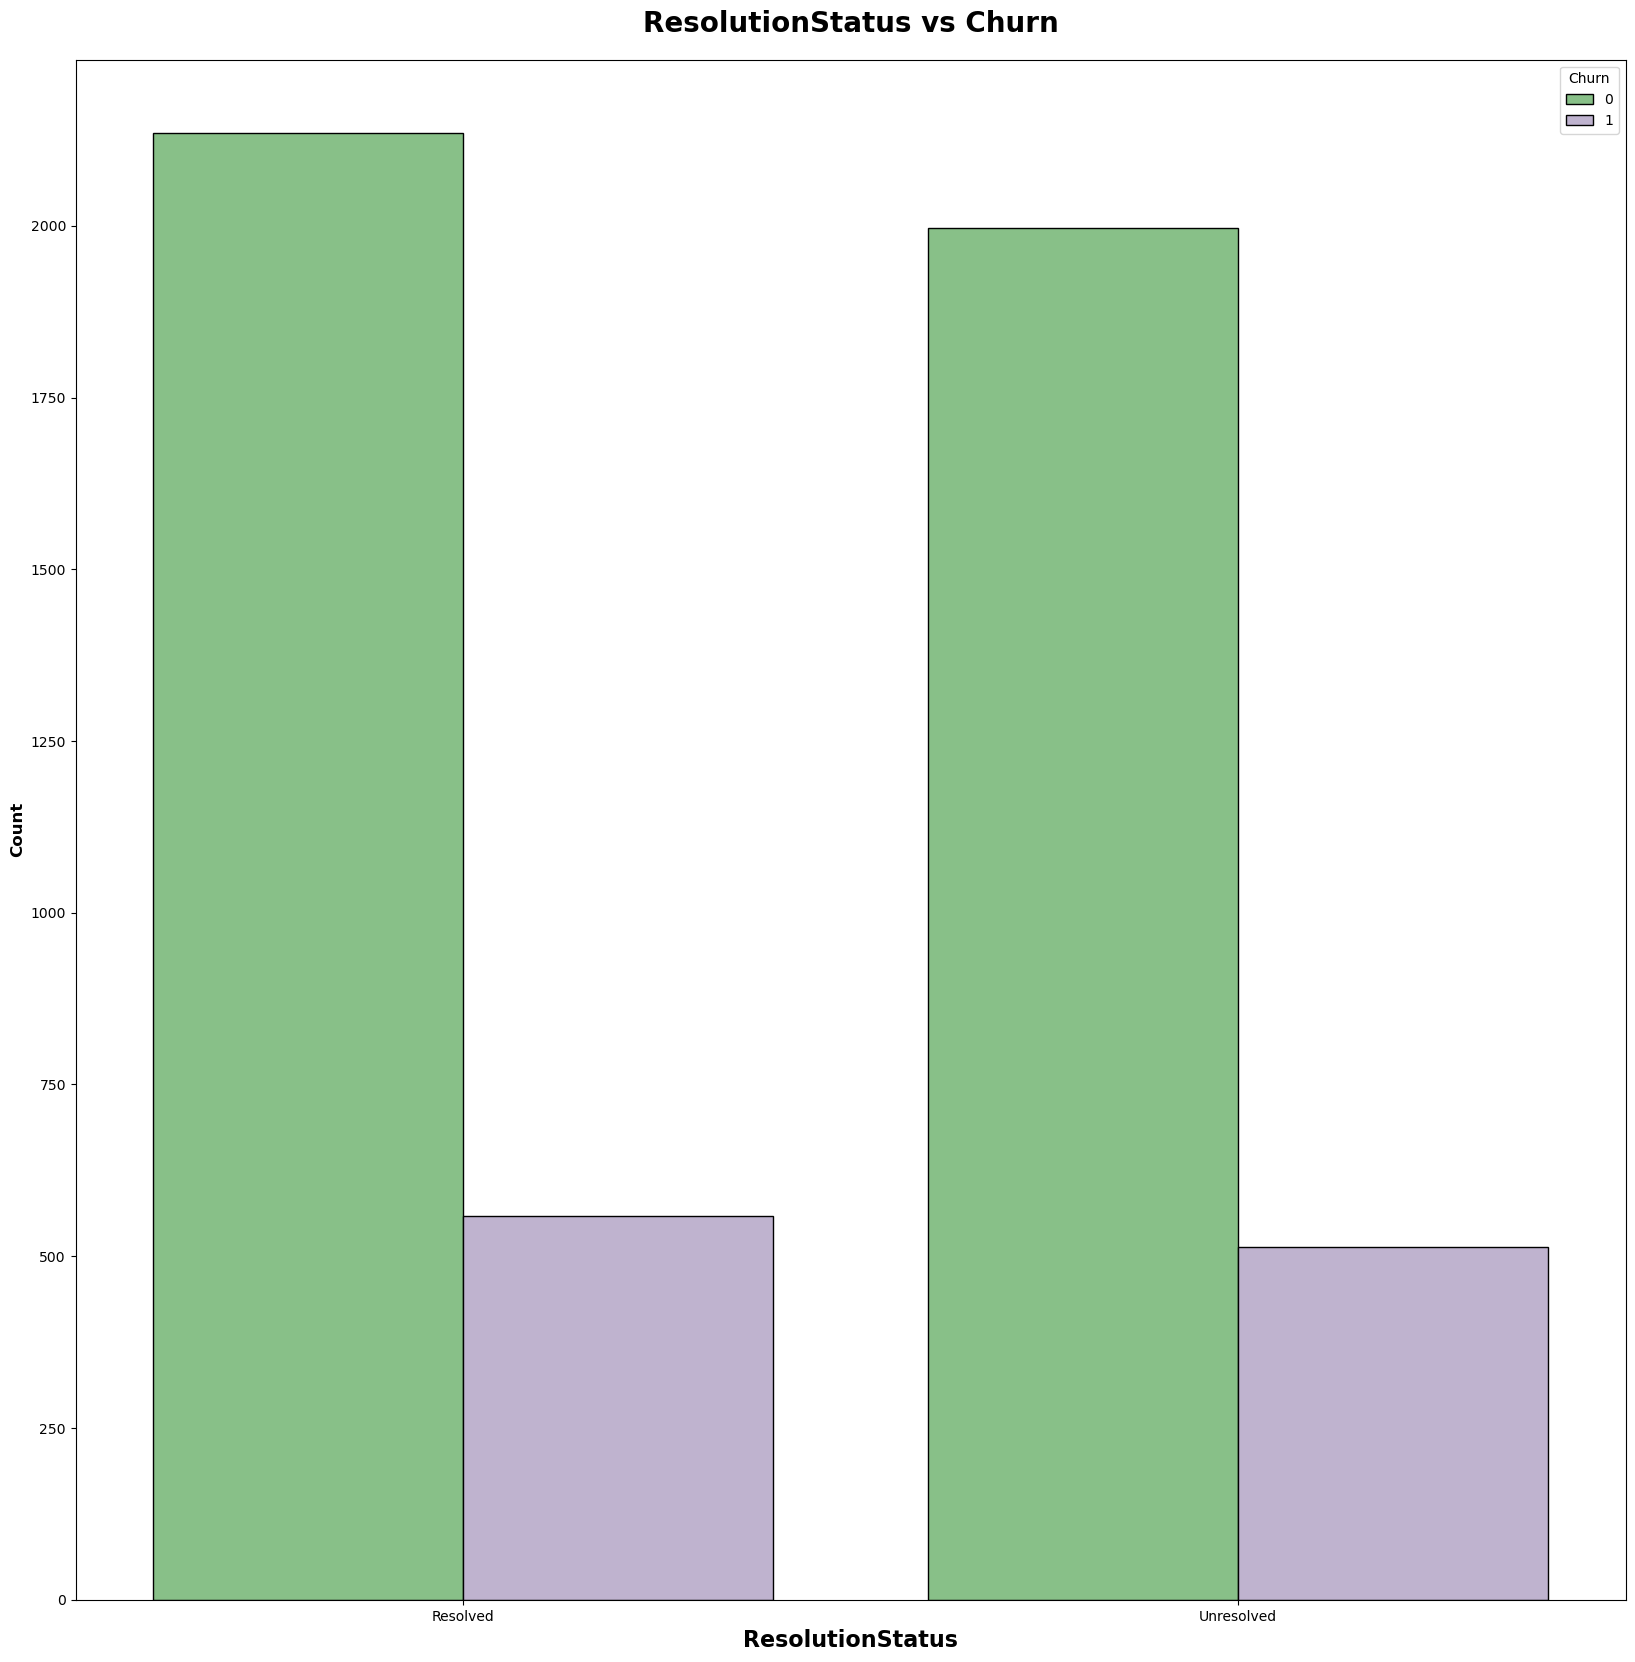

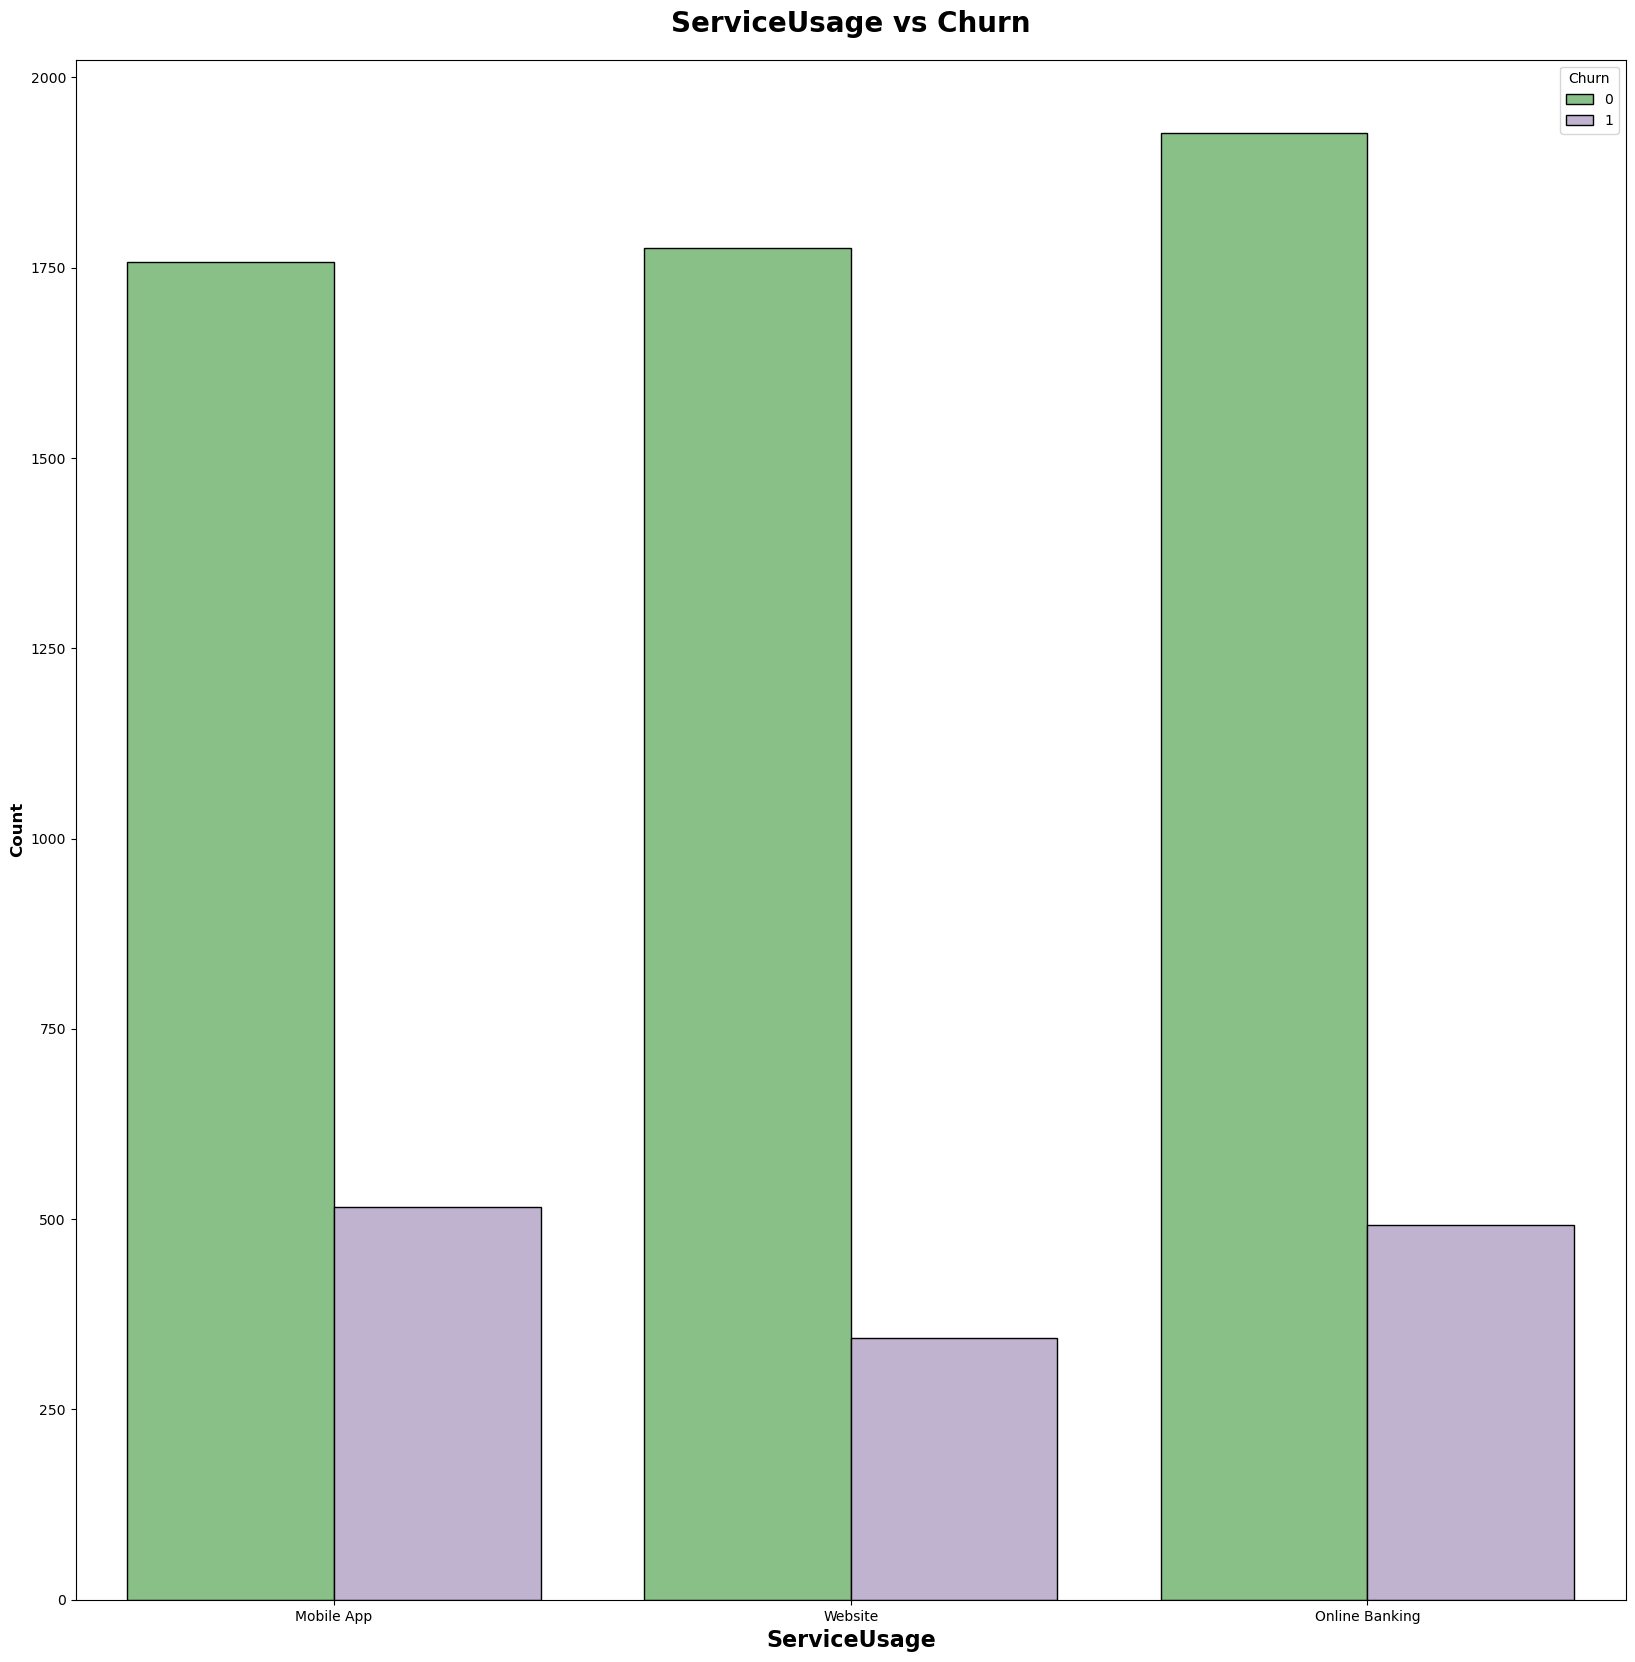

In [403]:
for col in cat_cols:
    bivariate_plot(col)

#### Bi-Variate Analysis of Numerical Features

C:\Users\NyRz\AppData\Local\Temp\ipykernel_26632\3534750580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ChurnStatus', y=col,  palette=clr1, ax=ax[i,0])
C:\Users\NyRz\AppData\Local\Temp\ipykernel_26632\3534750580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ChurnStatus', y=col,  palette=clr1, ax=ax[i,0])
C:\Users\NyRz\AppData\Local\Temp\ipykernel_26632\3534750580.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ChurnStatus', y=col,  palette=clr1, ax=ax[i,0])


IndexError: index 3 is out of bounds for axis 0 with size 3

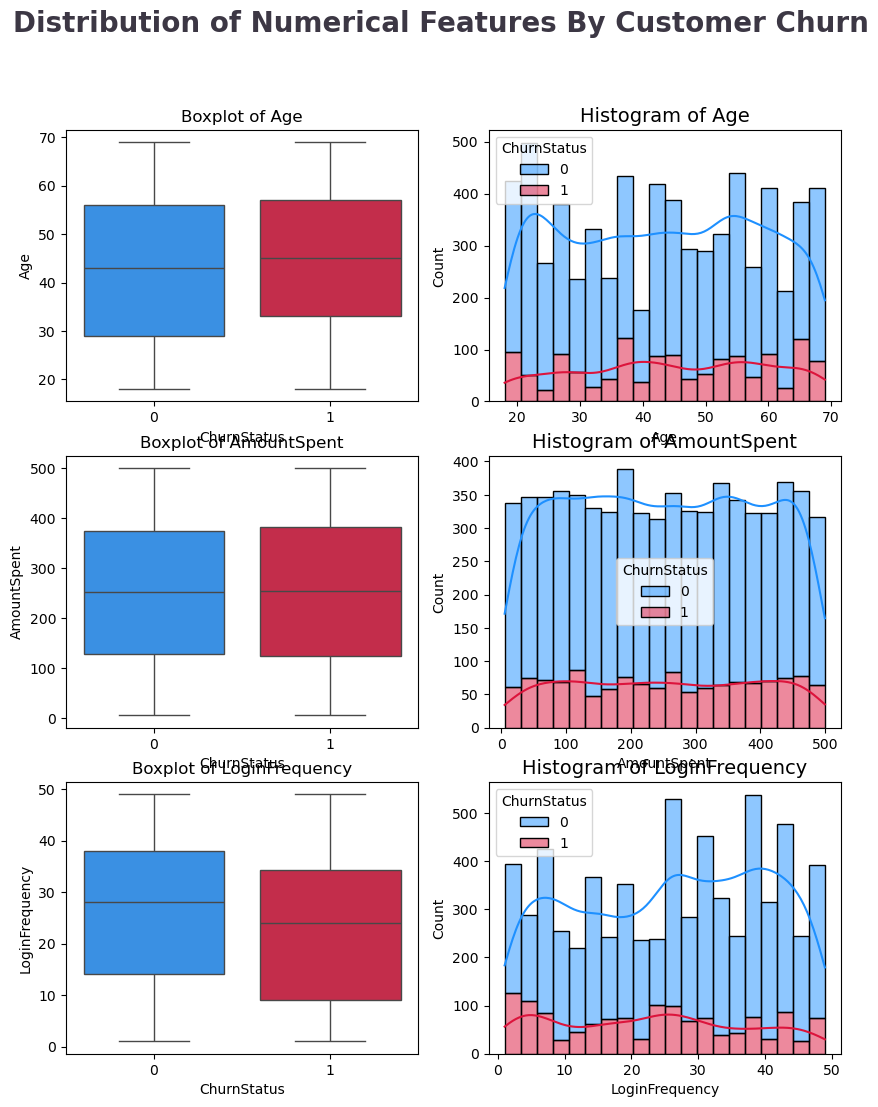

In [324]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize=(10,12))
fig.suptitle('Distribution of Numerical Features By Customer Churn', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')
for i, col in enumerate(num_cols):   
    sns.boxplot(data=df, x='ChurnStatus', y=col,  palette=clr1, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)
    sns.histplot(data=df, x=col, hue='ChurnStatus', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)
fig.tight_layout()
fig.subplots_adjust(top=0.90)

### 3. Correlation analysis (Numerical Features)

<Axes: >

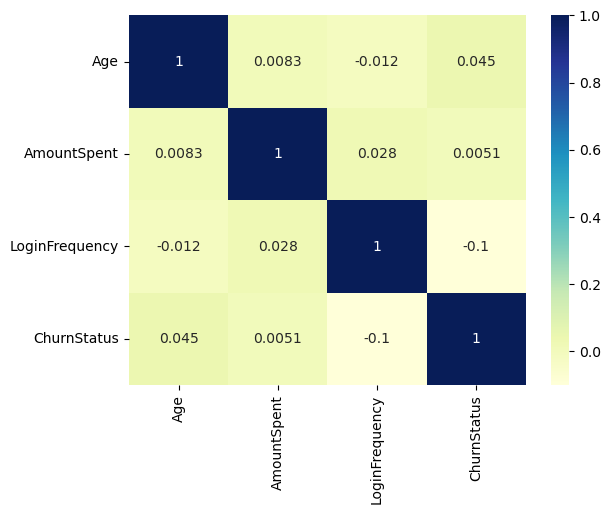

In [79]:
# Compute correlation matrix
co_mtx = df.corr(numeric_only=True)

# Plot correlation heatmap
sns.heatmap(co_mtx, cmap="YlGnBu", annot=True)

#### There is no any strong correlation between numerical features.

### 4. Correlation Analysis (Categorical Data)

In [83]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in cat_cols:
    if chi2_contingency(pd.crosstab(df['ChurnStatus'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[cat_cols, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,Gender,Reject Null Hypothesis
1,MaritalStatus,Reject Null Hypothesis
2,IncomeLevel,Reject Null Hypothesis
3,ProductCategory,Fail to Reject Null Hypothesis
4,InteractionType,Fail to Reject Null Hypothesis
5,ResolutionStatus,Fail to Reject Null Hypothesis
6,ServiceUsage,Reject Null Hypothesis


#### Here ProductCategory, InteractionType, ResolutionStatus doesn't correlate with Customer Churn.

In [85]:
### Dropping the categorical columns with no correlation with churn status
cols_drop = ['ProductCategory', 'InteractionType', 'ResolutionStatus']
df = df.drop(columns=cols_drop, axis=1)

####

#### Generating Hypothesis

In [95]:
#### 1. Customers using the online banking and mobile banking for service is less more to churn.
#### 2. The age group between 35 to 65 are more likely to churn.
#### 3. Customers who have less login frequency are more likely to churn.


### Feature Engineering

In [102]:
df.head()

,Age,Gender,MaritalStatus,IncomeLevel,AmountSpent,LoginFrequency,ServiceUsage,ChurnStatus
0,62,M,Single,Low,416.50,34,Mobile App,0
1,65,M,Married,Low,54.96,5,Website,1
2,65,M,Married,Low,197.50,5,Website,1
3,65,M,Married,Low,101.31,5,Website,1
4,65,M,Married,Low,397.37,5,Website,1


In [193]:
df = pd.get_dummies(df, columns=['Gender','MaritalStatus','IncomeLevel','ServiceUsage'], drop_first=True)

KeyError: "None of [Index(['Gender', 'MaritalStatus', 'IncomeLevel', 'ServiceUsage'], dtype='object')] are in the [columns]"

### Train Test Split

In [195]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [197]:
X = df.drop('ChurnStatus', axis=1)
y = df['ChurnStatus']

In [199]:
le = LabelEncoder()
y = le.fit_transform(y)

In [201]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42)
X_train.shape, X_test.shape

((5449, 11), (1363, 11))

In [203]:
from imblearn.over_sampling import SMOTE

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTE(random_state=42,sampling_strategy='minority' )
# Fit the model to generate the data.
X_res, y_res = smt.fit_resample(X_train, y_train)
X_res.shape , y_res.shape

((8698, 11), (8698,))

In [130]:
numeric_features = X_res.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [205]:
categorical_features = X_res.select_dtypes(include=["object", "category"]).columns.tolist()

### Preprocessing Pipeline

In [208]:
# 4. Preprocessing Pipelines
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

In [210]:
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [212]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [276]:
def evaluate_model(name, pipeline, param_grid):
    print("\n" + "="*65)
    print(f"🔹 Model: {name}")
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    grid = GridSearchCV(pipeline, param_grid, cv=cv,
                        scoring="accuracy", n_jobs=-1)
    grid.fit(X_res, y_res)

    print("Best Params:", grid.best_params_)
    print(f"Best CV Accuracy: {grid.best_score_:.4f}")

    best = grid.best_estimator_
    preds = best.predict(X_test)

    acc = accuracy_score(y_test, preds)
    print(f"Test Accuracy: {acc:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, preds))
    print("Confusion Matrix:\n", confusion_matrix(y_test, preds))
    return {"Model": name, "CV_Accuracy": grid.best_score_, "Test_Accuracy": acc, "best": best}

In [278]:
models_and_grids = []

In [280]:
# Logistic Regression + PCA
logreg_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("pca", PCA(n_components=0.8)),
    ("clf", LogisticRegression(max_iter=5000, multi_class="multinomial", class_weight='balanced'))
])
logreg_grid = {
    "pca__n_components": [0.9, 0.95],
    "clf__C": [0.001, 0.01, 0.1, 1, 10],
    "clf__solver": ["lbfgs"],
    "clf__penalty": ["l2"],
    "clf__class_weight": [None, "balanced"],
    "clf__max_iter": [1000, 3000, 5000]
}
models_and_grids.append(("Logistic Regression", logreg_pipe, logreg_grid))

In [282]:
# Random Forest (no PCA)
rf_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", RandomForestClassifier(random_state=42, class_weight='balanced'))
])
rf_grid = {
    "clf__n_estimators": [100, 200],
    "clf__max_depth": [5, 10, None],
    "clf__min_samples_split": [2, 5]
}
models_and_grids.append(("Random Forest", rf_pipe, rf_grid))


In [284]:
# XGBoost (no PCA)
xgb_pipe = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", XGBClassifier(
    n_estimators=300,       # number of trees
    learning_rate=0.05,     # step size shrinkage
    max_depth=2,            # maximum depth of trees
    subsample=0.8,          # random subset of training rows
    colsample_bytree=0.8,   # random subset of features
    eval_metric='auc',      # metric for evaluation
    use_label_encoder=False,
    random_state=42,
))
])
xgb_grid = {
    "clf__n_estimators": [100, 200],
    "clf__max_depth": [3, 6, 10],
    "clf__learning_rate": [0.05, 0.1],

}
models_and_grids.append(("XGBoost", xgb_pipe, xgb_grid))

In [286]:
results = []
for name, pipe, grid in models_and_grids:
    try:
        res = evaluate_model(name, pipe, grid)
        results.append(res)
    except Exception as e:
        print(f"❌ {name} failed: {e}")


🔹 Model: Logistic Regression
Best Params: {'clf__C': 0.001, 'clf__class_weight': None, 'clf__max_iter': 1000, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs', 'pca__n_components': 0.9}
Best CV Accuracy: 0.5678
Test Accuracy: 0.5767

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.59      0.69      1111
           1       0.22      0.51      0.31       252

    accuracy                           0.58      1363
   macro avg       0.53      0.55      0.50      1363
weighted avg       0.73      0.58      0.62      1363

Confusion Matrix:
 [[657 454]
 [123 129]]

🔹 Model: Random Forest
Best Params: {'clf__max_depth': None, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
Best CV Accuracy: 0.8810
Test Accuracy: 0.8767

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      1111
           1       0.63      0.81      0.71       252

    accuracy           

C:\Users\NyRz\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:03:30] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Params: {'clf__learning_rate': 0.1, 'clf__max_depth': 10, 'clf__n_estimators': 200}
Best CV Accuracy: 0.8719
Test Accuracy: 0.8701

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.88      0.92      1111
           1       0.61      0.82      0.70       252

    accuracy                           0.87      1363
   macro avg       0.78      0.85      0.81      1363
weighted avg       0.89      0.87      0.88      1363

Confusion Matrix:
 [[979 132]
 [ 45 207]]


#### RandomForestClassifier performed the best with the Training accuracy of 88.10% and Testing accuracy of 87.67% 

### Feature Importance

In [290]:
evaluation_result = results[1]

In [316]:
best= evaluation_result['best']
rf_best = best.named_steps["clf"].feature_importances_
feature_names = best.named_steps["preprocessor"].get_feature_names_out()

In [318]:
### Creating pandas series for feature importance
important_rf = pd.Series(rf_best, index=feature_names)

In [320]:
### Sort important features
sort_important_rf = important_rf.sort_values()

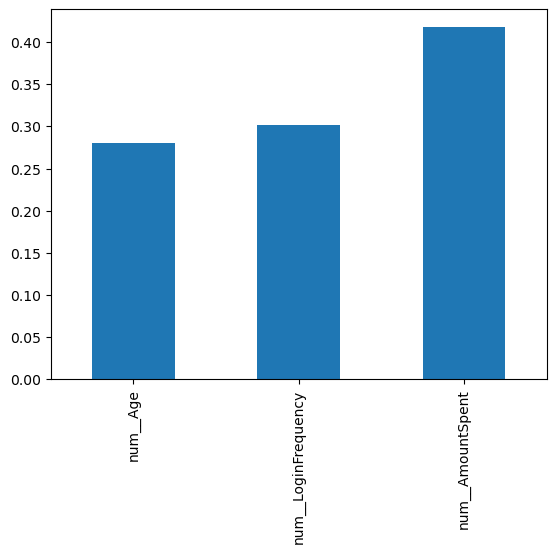

In [322]:
sort_important_rf.plot(kind='bar')
plt.show()